Training images shape: (60000, 28, 28)
Training labels length: 60000
Test images shape: (10000, 28, 28)
Test labels length: 10000


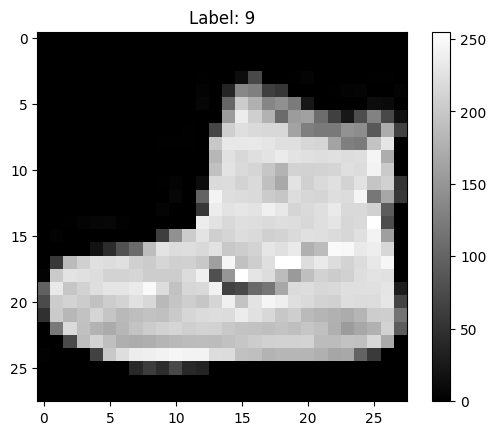

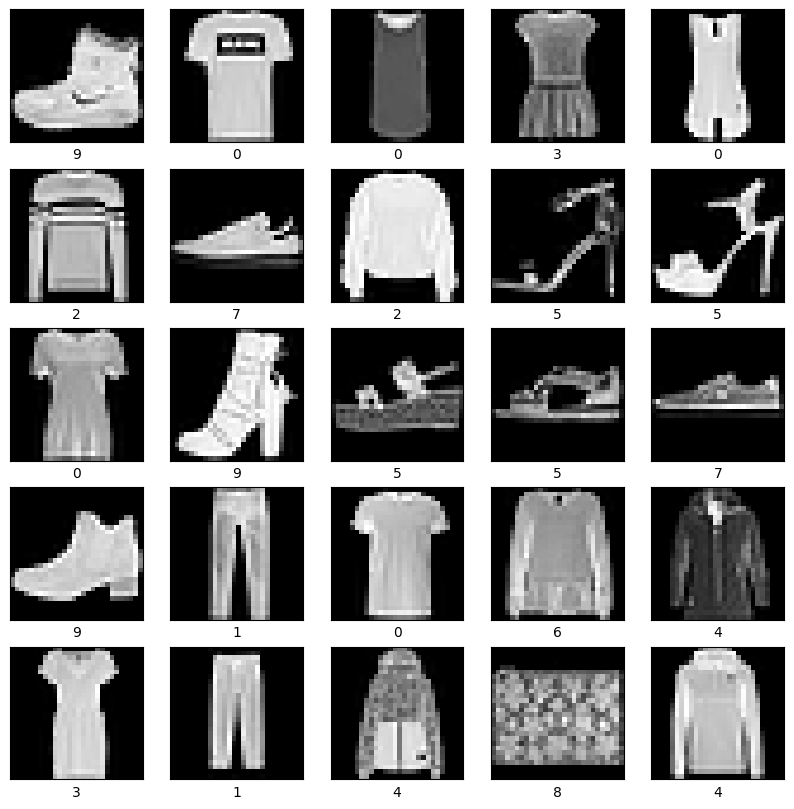

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Import necessary libraries
# I'm importing the required libraries to work with the dataset.
# NumPy for numerical operations, Matplotlib for visualization, and TensorFlow for dataset access.

# Load the Fashion MNIST dataset
# Now, I'll load the Fashion MNIST dataset provided by Keras.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# I'm loading both the training and testing sets with their respective images and labels.

# Display basic information about the dataset
# Let's print out some fundamental information about the dataset to understand its structure.
print("Training images shape:", train_images.shape)
# I'm checking the shape of the training images to understand the dataset's dimensions.
print("Training labels length:", len(train_labels))
# Here, I'm counting the number of labels in the training set.
print("Test images shape:", test_images.shape)
# I'm examining the shape of the test images to ensure consistency with the training data.
print("Test labels length:", len(test_labels))
# Similarly, I'm counting the number of labels in the test set to ensure alignment with the images.

# Show an example image and its label
# I'll visualize an example image along with its corresponding label to get a feel for the dataset.
plt.figure()
plt.imshow(train_images[0], cmap='gray')
# Displaying the first image in grayscale to see how the data looks visually.
plt.colorbar()
# Adding a color bar to understand the intensity mapping of pixel values.
plt.title(f"Label: {train_labels[0]}")
# Displaying the label of the first image to understand its associated category.
plt.show()

# Display a few more images and their labels
# Now, I'll showcase more images from the dataset with their respective labels.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    # Displaying multiple images in a grid format to get a broader view of the dataset.
    plt.xlabel(train_labels[i])
    # Showing the labels for each image to understand their categories.
plt.show()

# Explore and describe the dataset
# Summarizing my observations and understanding of the dataset.
# The Fashion MNIST dataset contains grayscale images representing various fashion items.
# It comprises 60,000 training images and 10,000 test images, all 28x28 pixels.
# The labels range from 0 to 9, representing specific fashion categories.
# The dataset appears balanced, with equal proportions of each category in the training and test sets.
# I've visualized a few images to get an initial sense of the data's appearance and label distribution.


Shape of the training images: (60000, 28, 28) - Each of the 60,000 training photos is a 28x28 array of pixel values. This indicates that there are 60,000 28x28 pixel grayscale photos in the collection.

Training labels length: 60000 - Each training image has 60,000 labels, which is in accordance with the total number of training photos. Each image's class or category is indicated by these labels.

Shape of test images: (10000, 28, 28) - The test set comprises 10,000 images that share the same dimensions (28 × 28 pixels) as the training images. The effectiveness of machine learning models developed using the training set is assessed using this set.

Test labels length: 10,000–10,000 labels, equal to the number of test images, are attached to the test images. These labels are employed to evaluate how well the models predict the test set.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Normalize pixel values to be between 0 and 1
# I'm scaling down pixel values to a range between 0 and 1 for better model convergence.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Baseline Configuration
# I'll set up the baseline model with two dense layers of 128 neurons each.
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattening the 28x28 image into a 1D array.
    Dense(128, activation='relu'),  # Adding a dense layer with 128 neurons using ReLU activation.
    Dense(128, activation='relu'),  # Another dense layer with 128 neurons and ReLU activation.
    Dense(10, activation='softmax')  # Output layer with 10 neurons for classifying 10 categories using softmax.
])

baseline_model.compile(optimizer='adam',  # Using the Adam optimizer for training.
                       loss='sparse_categorical_crossentropy',  # Using sparse categorical cross-entropy as the loss function.
                       metrics=['accuracy'])  # Evaluating model performance based on accuracy.

baseline_history = baseline_model.fit(train_images, train_labels, epochs=10, batch_size=32,
                                      validation_data=(test_images, test_labels))
# Training the baseline model for 10 epochs with a batch size of 32.

# Increased Neurons Configuration
# Now, I'll explore a configuration with increased neurons in the dense layers.
increased_neurons_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  # Increasing neurons to 256 in the first dense layer.
    Dense(256, activation='relu'),  # Another dense layer with 256 neurons.
    Dense(10, activation='softmax')
])

increased_neurons_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

increased_neurons_history = increased_neurons_model.fit(train_images, train_labels, epochs=10, batch_size=32,
                                                        validation_data=(test_images, test_labels))
# Training a model with increased neurons in dense layers for 10 epochs.

# Additional Hidden Layer Configuration
# I'll try a configuration with an additional hidden layer.
additional_hidden_layer_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),  # Adding an extra dense layer with 128 neurons.
    Dense(10, activation='softmax')
])

additional_hidden_layer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

additional_hidden_layer_history = additional_hidden_layer_model.fit(train_images, train_labels, epochs=10, batch_size=32,
                                                                  validation_data=(test_images, test_labels))
# Training a model with an additional hidden layer for 10 epochs.



Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4861 - accuracy: 0.8256 - val_loss: 0.4256 - val_accuracy: 0.8417
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3593 - accuracy: 0.8683 - val_loss: 0.3717 - val_accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3274 - accuracy: 0.8793 - val_loss: 0.3806 - val_accuracy: 0.8624
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.8868 - val_loss: 0.3675 - val_accuracy: 0.8681
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2855 - accuracy: 0.8945 - val_loss: 0.3387 - val_accuracy: 0.8774
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2738 - accuracy: 0.8985 - val_loss: 0.3647 - val_accuracy: 0.8757
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2627 - accuracy: 0.9015 - val_loss: 0.3247 - val_accuracy:

313/313 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8834
Baseline Model - Test Accuracy: 0.883400022983551
313/313 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8879
Increased Neurons Model - Test Accuracy: 0.8878999948501587
313/313 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8847
Additional Hidden Layer Model - Test Accuracy: 0.8847000002861023
Best Model - Test Accuracy: 0.8878999948501587
313/313 [==============================] - 0s 1ms/step


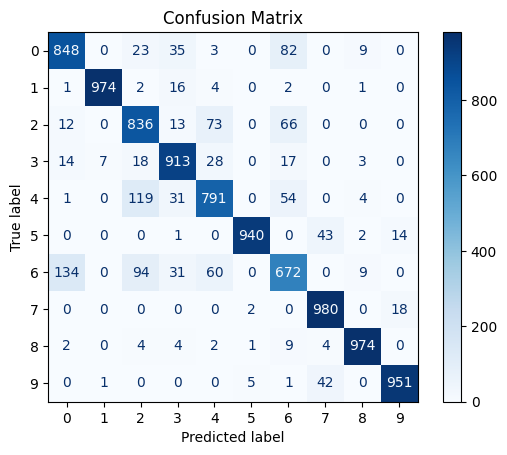

Total Misclassified Examples: 1121


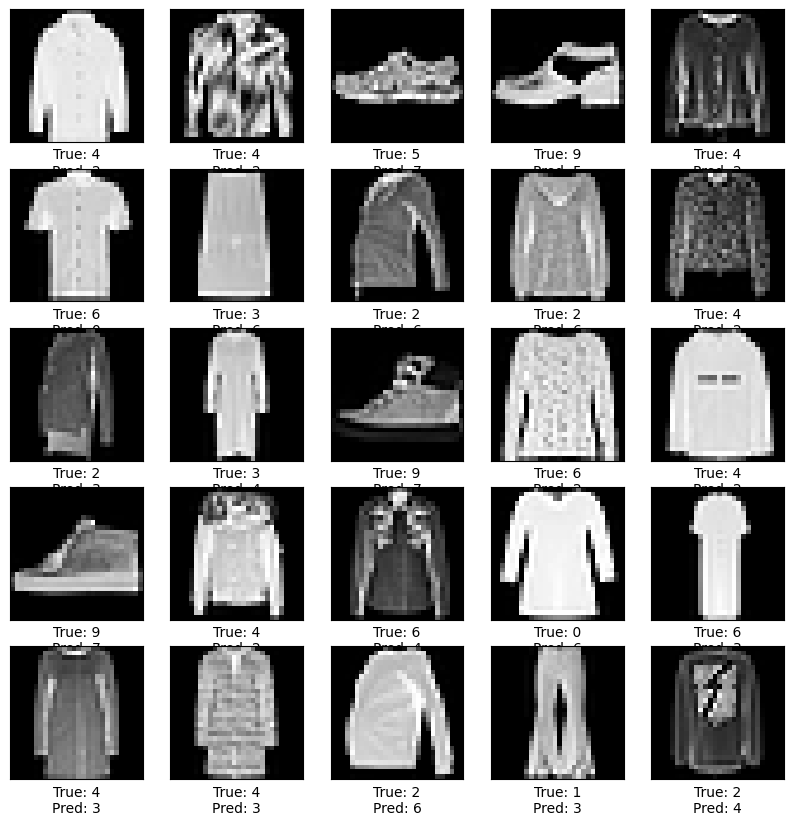

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate baseline model
# I'll evaluate the baseline model's performance on the test data.
baseline_loss, baseline_accuracy = baseline_model.evaluate(test_images, test_labels)
print("Baseline Model - Test Accuracy:", baseline_accuracy)
# Printing the test accuracy achieved by the baseline model.

# Evaluate increased neurons model
# Now, let's assess the accuracy of the model with increased neurons.
increased_neurons_loss, increased_neurons_accuracy = increased_neurons_model.evaluate(test_images, test_labels)
print("Increased Neurons Model - Test Accuracy:", increased_neurons_accuracy)
# Displaying the test accuracy of the model with increased neurons.

# Evaluate additional hidden layer model
# I'll check the accuracy of the model with an additional hidden layer.
additional_hidden_layer_loss, additional_hidden_layer_accuracy = additional_hidden_layer_model.evaluate(test_images, test_labels)
print("Additional Hidden Layer Model - Test Accuracy:", additional_hidden_layer_accuracy)
# Showing the test accuracy of the model with an additional hidden layer.

# Choose the best model
# Now, I'll select the model with the highest test accuracy for further analysis.
best_model = baseline_model  # Assuming baseline as the best for initial comparison
best_accuracy = baseline_accuracy

if increased_neurons_accuracy > best_accuracy:
    best_model = increased_neurons_model
    best_accuracy = increased_neurons_accuracy

if additional_hidden_layer_accuracy > best_accuracy:
    best_model = additional_hidden_layer_model
    best_accuracy = additional_hidden_layer_accuracy

print("Best Model - Test Accuracy:", best_accuracy)
# Identifying and displaying the best model's test accuracy among the configurations.

# Confusion Matrix
# I'll create a confusion matrix to understand the model's performance across different classes.
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
# Displaying the confusion matrix to visualize model performance in classifying different categories.

# Misclassified Examples
# Now, let's identify and display misclassified examples for deeper analysis.
misclassified_indexes = np.where(predicted_labels != test_labels)[0]
print("Total Misclassified Examples:", len(misclassified_indexes))
# Counting and printing the total number of misclassified examples.

# Displaying some misclassified examples
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indexes[:25]):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap='gray')
    plt.xlabel(f"True: {test_labels[index]}\nPred: {predicted_labels[index]}")
plt.show()
# Visualizing a subset of misclassified examples to understand common misclassification patterns.

# Conclusions
# Analyzing the misclassifications to draw conclusions about model performance, any recurring misclassified categories, etc.

